# Credit Limit Predcition Machine Learning Project

Description :A machine learning project that predicts Credit limit score(Regression) risk based on factors 
Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
.It uses algorithms to identify patterns and provide personalized prediction of Credit Limit Score.
Regression Problem

In [84]:
# Machine Learning Life Cycle Steaps :
# Problem Definition
# Data Collection
# Data Cleaning
# Exploratory Data Analysis (EDA)
# Feature Engineering and Selection
# Data Preprocessing
# Data Spliting
# Model Selection
# Model Training
# Model Evaluation and Tuning
# Model Deployment
# Model Monitoring and Maintenance

Steap-1 : Problem Statement / Defination

In [85]:
# Limit variable is the contnious nature variable.so it comes in the Regression problem 
#of ML Learning i.e superviesd Learning 
#to predicit result based of Credict factor input by user. 

Steap-2 : Data Collecting

In [86]:
import pandas as pd 
import numpy as np

In [87]:
df=pd.read_csv("dataset.csv")
df

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Steap-3 : Data Cleaning 

In [88]:
df.isnull().sum()

ID           0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [89]:
df.duplicated().sum()

0

In [90]:
df.isna().sum()

ID           0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

Steap-4 : Exploratory Data Analysis-(EDA)

In [91]:
import matplotlib.pyplot as plt 
import seaborn as sns

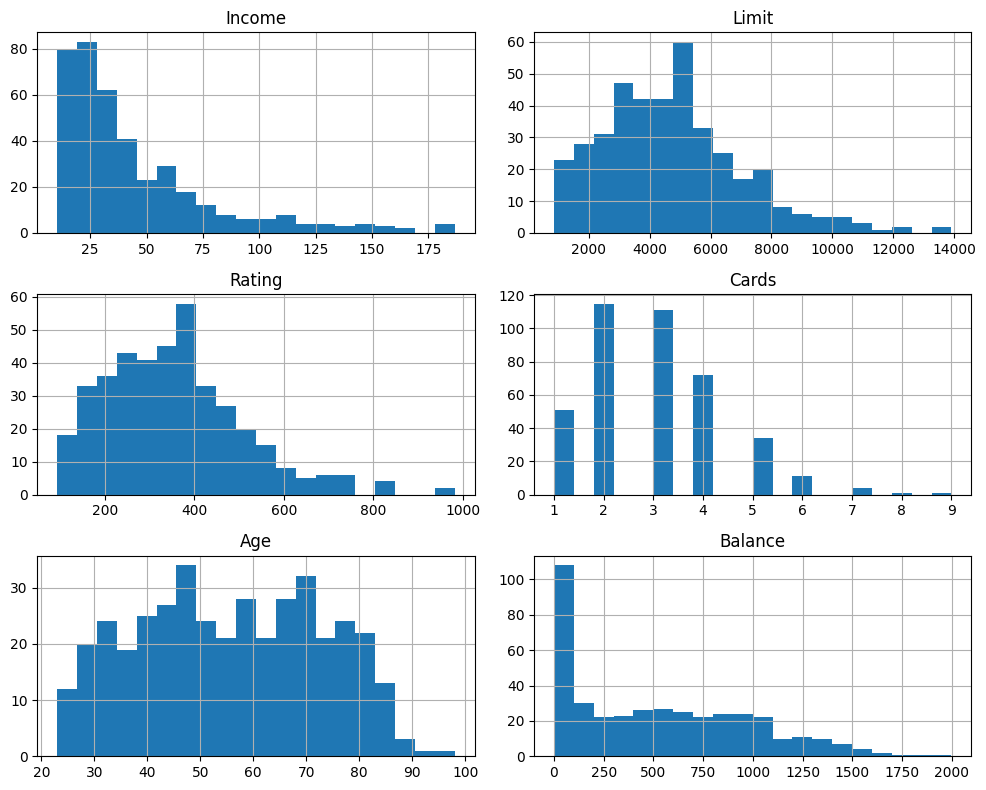

In [92]:
# Histograms for numerical columns
df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

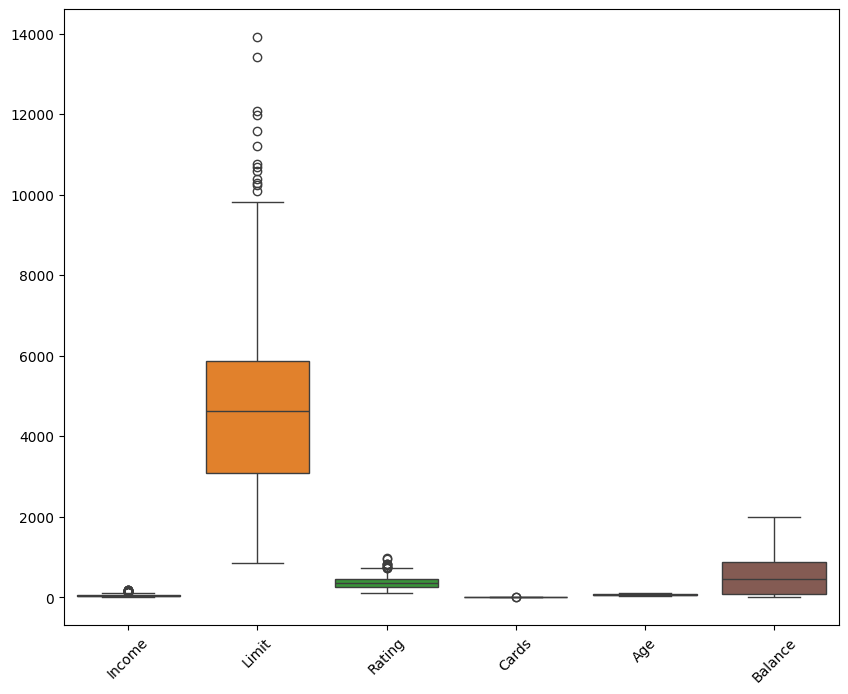

In [93]:
# Boxplot for numerical features
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance']])
plt.xticks(rotation=45)
plt.show()


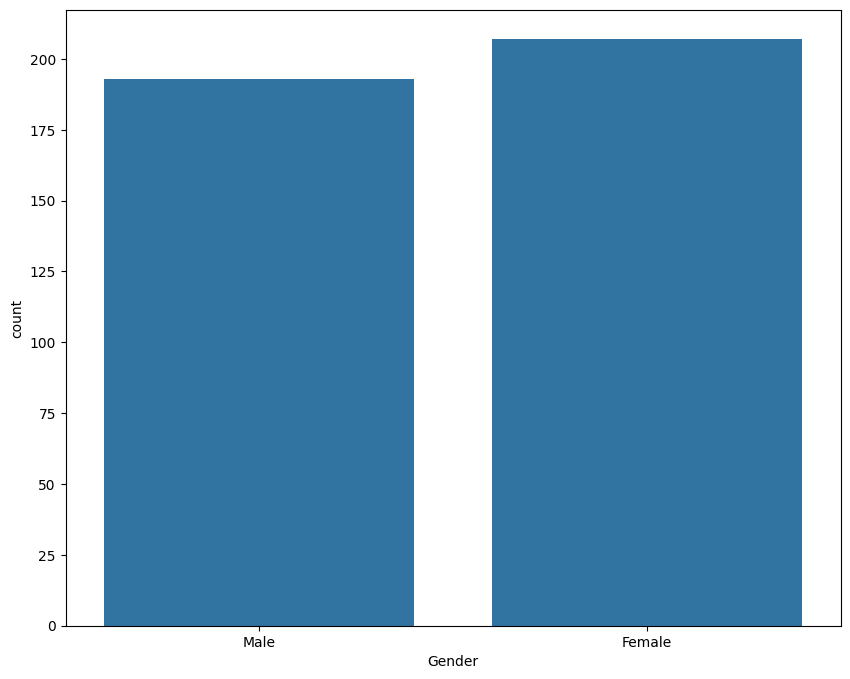

In [94]:
# Count plot for categorical columns
plt.figure(figsize=(10, 8))
sns.countplot(x='Gender', data=df)
plt.show()

# You can repeat the above for other categorical features like Student, Married, Ethnicity, Education.


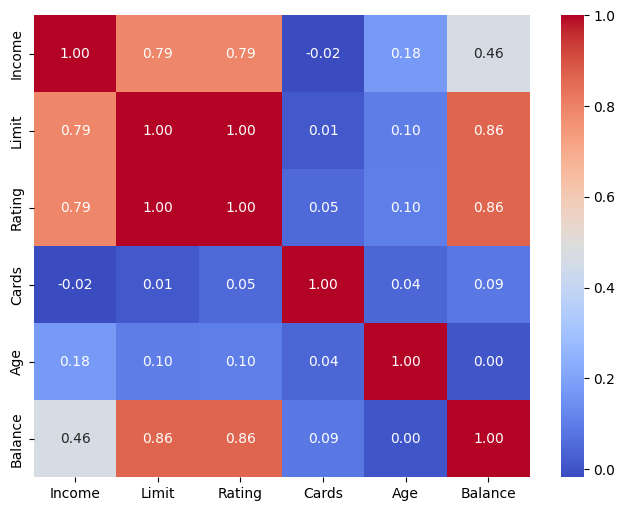

In [95]:
# Correlation matrix
corr_matrix = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


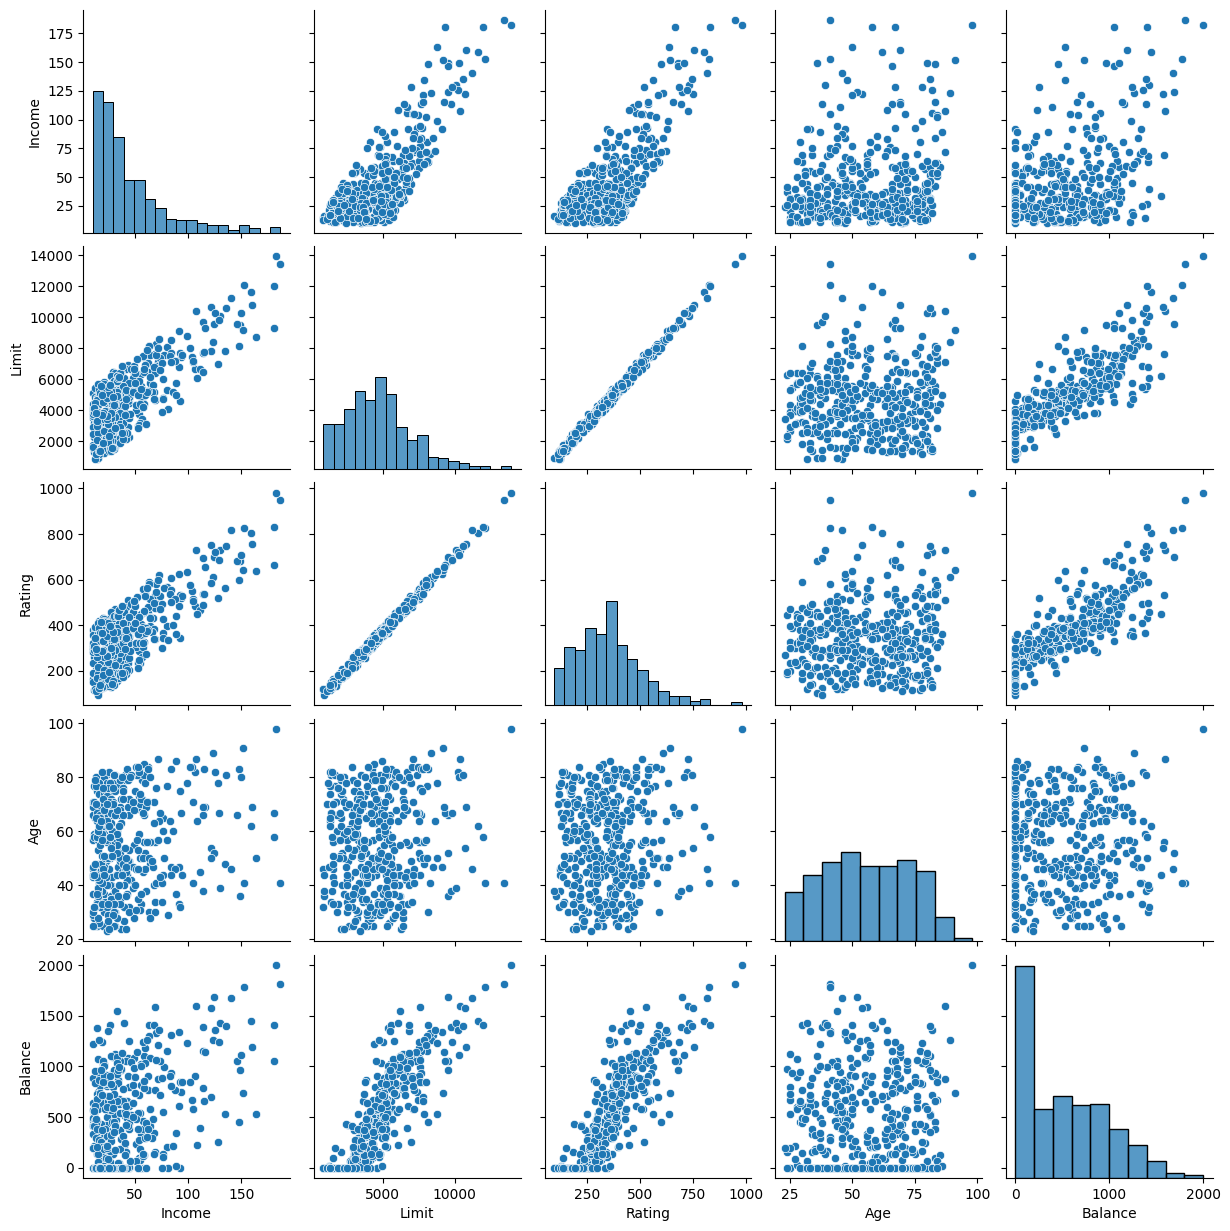

In [96]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[['Income', 'Limit', 'Rating', 'Age', 'Balance']])
plt.show()


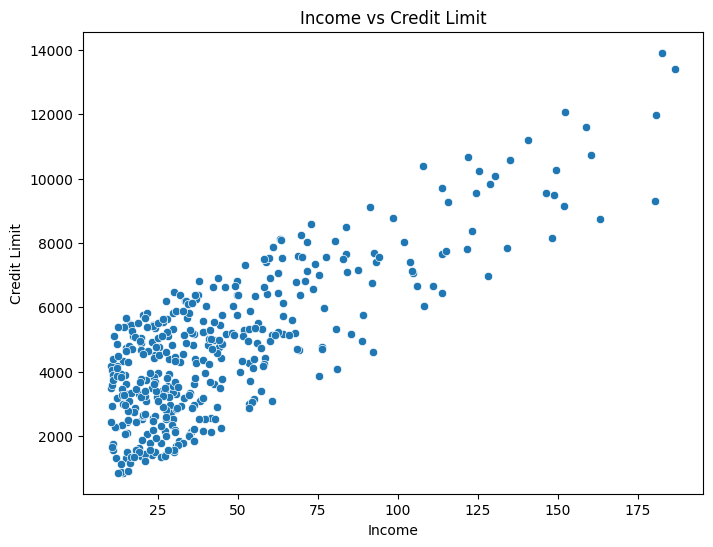

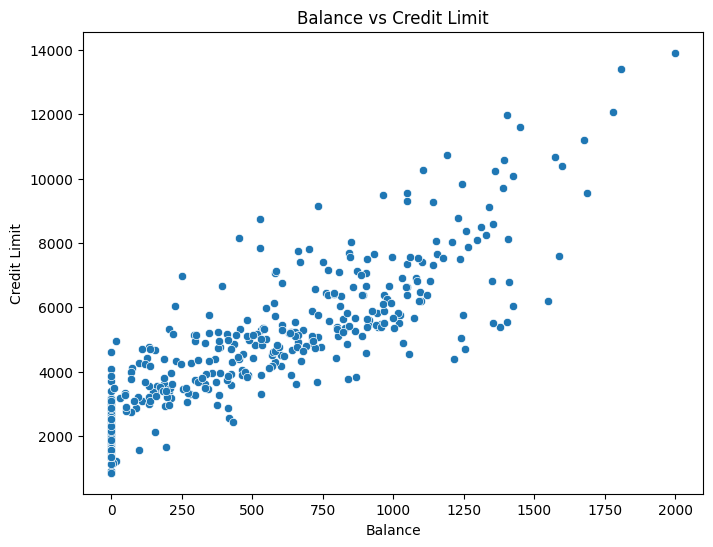

In [97]:
# Scatter plot to visualize the relationship between 'Income' and 'Limit'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Limit', data=df)
plt.title('Income vs Credit Limit')
plt.xlabel('Income')
plt.ylabel('Credit Limit')
plt.show()

# Scatter plot between 'Balance' and 'Limit' to observe correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Balance', y='Limit', data=df)
plt.title('Balance vs Credit Limit')
plt.xlabel('Balance')
plt.ylabel('Credit Limit')
plt.show()


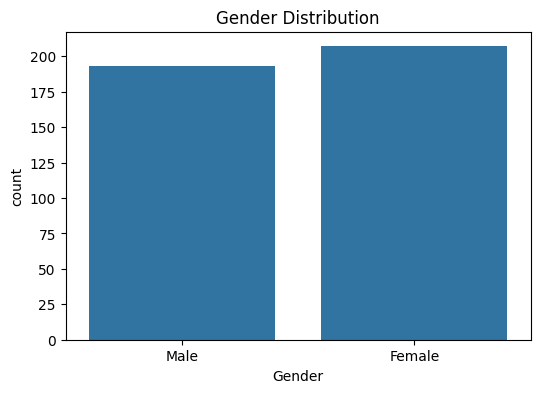

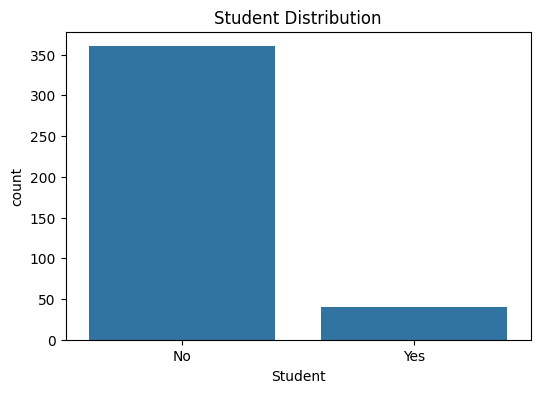

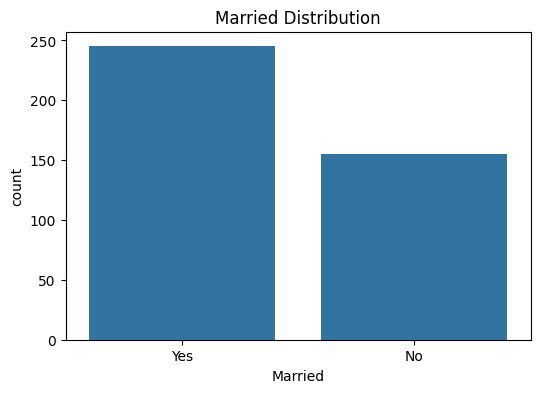

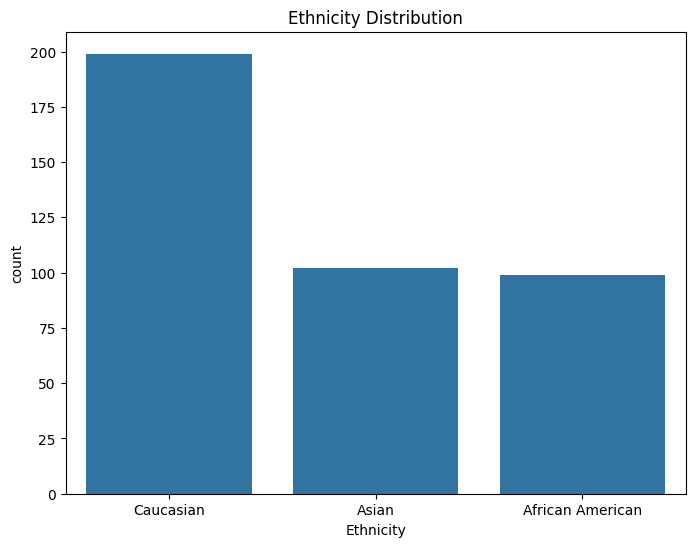

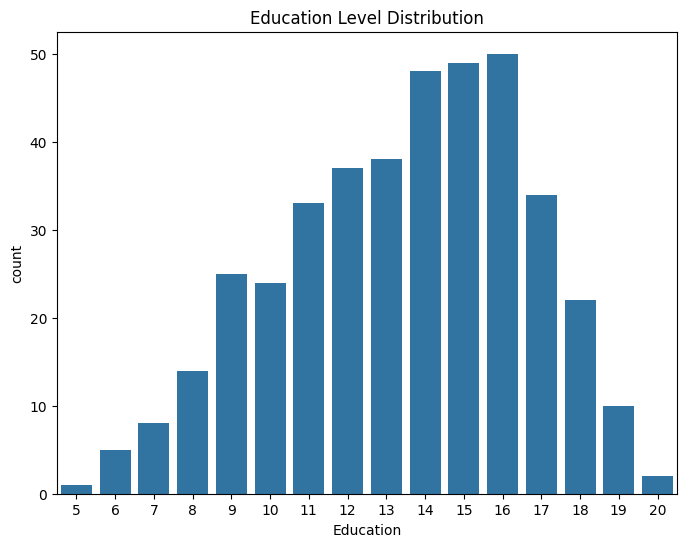

In [98]:
# Count plot for 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Count plot for 'Student'
plt.figure(figsize=(6, 4))
sns.countplot(x='Student', data=df)
plt.title('Student Distribution')
plt.show()

# Count plot for 'Married'
plt.figure(figsize=(6, 4))
sns.countplot(x='Married', data=df)
plt.title('Married Distribution')
plt.show()

# Count plot for 'Ethnicity'
plt.figure(figsize=(8, 6))
sns.countplot(x='Ethnicity', data=df)
plt.title('Ethnicity Distribution')
plt.show()

# Count plot for 'Education'
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df)
plt.title('Education Level Distribution')
plt.show()


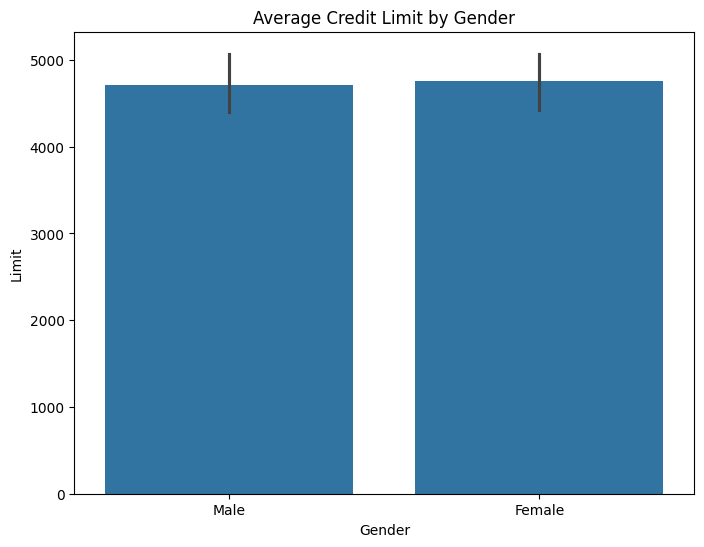

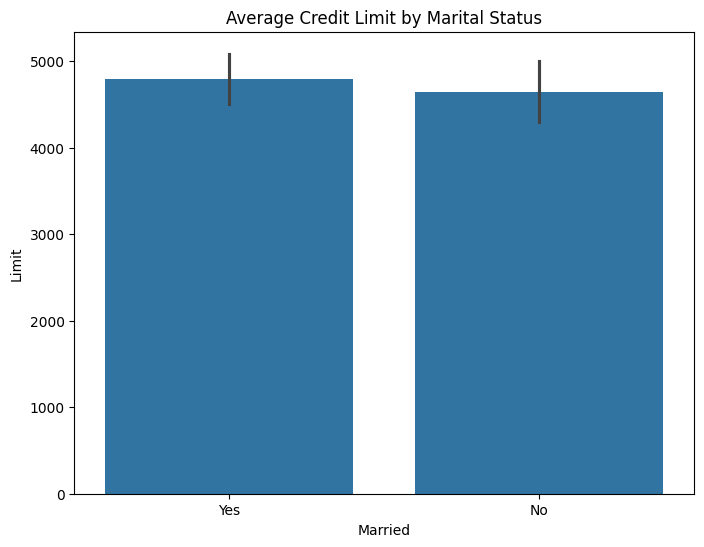

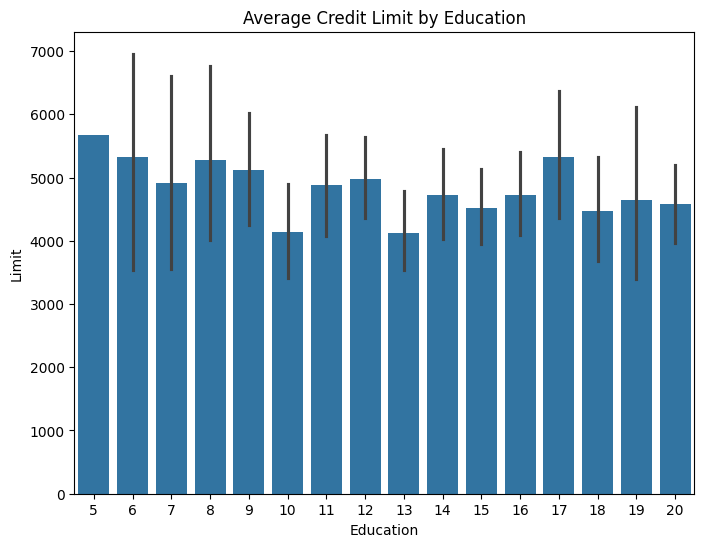

In [99]:
# Bar plot to show average 'Limit' for each 'Gender'
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Limit', data=df)
plt.title('Average Credit Limit by Gender')
plt.show()

# Bar plot to show average 'Limit' for each 'Married' status
plt.figure(figsize=(8, 6))
sns.barplot(x='Married', y='Limit', data=df)
plt.title('Average Credit Limit by Marital Status')
plt.show()

# Bar plot to show average 'Limit' by 'Education' level
plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Limit', data=df)
plt.title('Average Credit Limit by Education')
plt.show()


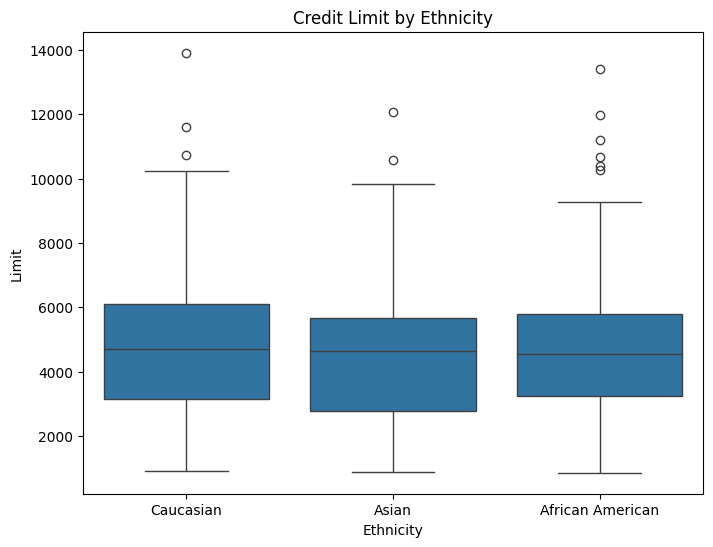

In [100]:
# Box plot for 'Limit' across different 'Ethnicity' categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='Ethnicity', y='Limit', data=df)
plt.title('Credit Limit by Ethnicity')
plt.show()


Steap-5 : Feature Engineering And Selection

In [101]:
#Remove unwanted Coloumns 
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


(None, (400, 12))

In [102]:
#split the dataset into object & num
num=df.select_dtypes(exclude="O")
obj=df.select_dtypes(include="O")

In [103]:
num

,ID,Income,Limit,Rating,Cards,Age,Education,Balance
0,1,14.891,3606,283,2,34,11,333
1,2,106.025,6645,483,3,82,15,903
2,3,104.593,7075,514,4,71,11,580
3,4,148.924,9504,681,3,36,11,964
4,5,55.882,4897,357,2,68,16,331
...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,560
396,397,13.364,3838,296,5,65,17,480
397,398,57.872,4171,321,5,67,12,138
398,399,37.728,2525,192,1,44,13,0


In [104]:
obj

,Gender,Student,Married,Ethnicity
0,Male,No,Yes,Caucasian
1,Female,Yes,Yes,Asian
2,Male,No,No,Asian
3,Female,No,No,Asian
4,Male,No,Yes,Caucasian
...,...,...,...,...
395,Male,No,Yes,Caucasian
396,Male,No,No,African American
397,Female,No,Yes,Caucasian
398,Male,No,Yes,Caucasian


In [105]:
num.columns

Index(['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Balance'],
      dtype='object')

In [106]:
obj.columns

Index(['Gender', 'Student', 'Married', 'Ethnicity'], dtype='object')

In [107]:
#Remove unwanted Coloumns 
df.drop(["ID","Education","Age","Education","Student","Married","Ethnicity"],axis=1,inplace=True)

In [108]:
df

,Income,Limit,Rating,Cards,Gender,Balance
0,14.891,3606,283,2,Male,333
1,106.025,6645,483,3,Female,903
2,104.593,7075,514,4,Male,580
3,148.924,9504,681,3,Female,964
4,55.882,4897,357,2,Male,331
...,...,...,...,...,...,...
395,12.096,4100,307,3,Male,560
396,13.364,3838,296,5,Male,480
397,57.872,4171,321,5,Female,138
398,37.728,2525,192,1,Male,0


Steap-6 : Data Preprocessing

In [109]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder

In [110]:
#create object 
encoder=OrdinalEncoder()

In [111]:
obj=df.select_dtypes(include="O")

In [113]:
obj

,Gender
0,Male
1,Female
2,Male
3,Female
4,Male
...,...
395,Male
396,Male
397,Female
398,Male


In [114]:
#fit the dataset into encoder
encoder.fit(obj)

OrdinalEncoder()

In [116]:
encoded_data=encoder.transform(obj)

In [118]:
encoder.get_feature_names_out()


array(['Gender'], dtype=object)

In [120]:
#to prepare the encoded datafram
cal2 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())


In [121]:
cal2

,Gender
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
395,1.0
396,1.0
397,0.0
398,1.0


In [125]:
num=df.select_dtypes(exclude="O")
num

,Income,Limit,Rating,Cards,Balance
0,14.891,3606,283,2,333
1,106.025,6645,483,3,903
2,104.593,7075,514,4,580
3,148.924,9504,681,3,964
4,55.882,4897,357,2,331
...,...,...,...,...,...
395,12.096,4100,307,3,560
396,13.364,3838,296,5,480
397,57.872,4171,321,5,138
398,37.728,2525,192,1,0


In [123]:
final_df=pd.concat([cal2,num],axis=1)

In [126]:
final_df

,Gender,Income,Limit,Rating,Cards,Balance
0,1.0,14.891,3606,283,2,333
1,0.0,106.025,6645,483,3,903
2,1.0,104.593,7075,514,4,580
3,0.0,148.924,9504,681,3,964
4,1.0,55.882,4897,357,2,331
...,...,...,...,...,...,...
395,1.0,12.096,4100,307,3,560
396,1.0,13.364,3838,296,5,480
397,0.0,57.872,4171,321,5,138
398,1.0,37.728,2525,192,1,0


In [127]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   400 non-null    float64
 1   Income   400 non-null    float64
 2   Limit    400 non-null    int64  
 3   Rating   400 non-null    int64  
 4   Cards    400 non-null    int64  
 5   Balance  400 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.9 KB


Steap-8 : Data Spliting 

In [128]:
from sklearn.model_selection import train_test_split

In [130]:
df=final_df

In [131]:
#Spliting the df in :
# Feature Variable -> X (Independent varaible)
# Target Variable -> Y (Dependent Variable)

In [134]:
#For X 
x=df.drop("Limit",axis=1)
x

,Gender,Income,Rating,Cards,Balance
0,1.0,14.891,283,2,333
1,0.0,106.025,483,3,903
2,1.0,104.593,514,4,580
3,0.0,148.924,681,3,964
4,1.0,55.882,357,2,331
...,...,...,...,...,...
395,1.0,12.096,307,3,560
396,1.0,13.364,296,5,480
397,0.0,57.872,321,5,138
398,1.0,37.728,192,1,0


In [135]:
#For Y
y=df[["Limit"]]
y

,Limit
0,3606
1,6645
2,7075
3,9504
4,4897
...,...
395,4100
396,3838
397,4171
398,2525


In [ ]:
#whole data set is split into 4 variables
# 1.x_train 80% of x
# 2.x_test 20% of x 
# 3.y_train 80% of y
# 4.y_test 20% of y

x_tain,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [138]:
x_tain

,Gender,Income,Rating,Cards,Balance
3,0.0,148.924,681,3,964
18,0.0,49.570,448,1,891
202,0.0,21.038,145,2,0
250,0.0,10.363,191,2,0
274,0.0,30.550,439,5,967
...,...,...,...,...,...
71,0.0,58.781,538,2,1103
106,1.0,16.819,115,2,0
270,1.0,15.866,217,1,136
348,1.0,13.433,112,3,0


In [139]:
x_test

,Gender,Income,Rating,Cards,Balance
209,0.0,151.947,642,2,732
280,0.0,53.401,377,3,541
33,1.0,31.367,162,4,0
210,0.0,24.543,243,2,95
93,1.0,16.479,388,2,937
...,...,...,...,...,...
246,0.0,19.588,265,4,199
227,0.0,66.989,430,3,482
369,1.0,71.682,599,3,1208
176,1.0,24.050,221,4,0


In [140]:
y_train

,Limit
3,9504
18,6384
202,1448
250,2430
274,5869
...,...
71,7402
106,1337
270,3085
348,1134


In [141]:
y_test

,Limit
209,9156
280,5319
33,1829
210,3206
93,5435
...,...
246,3211
227,5614
369,8028
176,2607


Steap-9 : Model Selection

In [ ]:
#Regression Problem
from sklearn.linear_model import LinearRegression

In [143]:
#create the object 
lr=LinearRegression()

Steap-10 : Model Traning  

In [144]:
#fit the train data in Algorithim 
lr.fit(x_tain,y_train)

LinearRegression()

Steap-11: Model Evaluation

In [146]:
print(lr.score(x_tain,y_train))   # training score 

0.9959843205606196


In [147]:
print(lr.score(x_test,y_test))  # testing score ( unseen data )


0.9935492069494312


In [151]:
#Prediction data variable 
y_pred=lr.predict(x_test)
y_pred,y_pred.shape

(array([[ 9062.31759265],
        [ 5053.9694461 ],
        [ 1792.06091003],
        [ 3109.73801347],
        [ 5312.86181314],
        [ 2807.9208897 ],
        [ 7370.66297562],
        [ 3061.73086869],
        [ 4689.88214048],
        [ 5809.85827974],
        [ 6832.77496504],
        [ 4890.24069978],
        [ 4655.91783754],
        [ 4877.68023628],
        [ 5435.92998774],
        [ 4723.39097808],
        [ 7184.76724505],
        [ 7179.32107601],
        [ 4982.52987036],
        [ 5382.78678565],
        [ 3333.20099378],
        [ 2397.82292679],
        [ 6540.75254773],
        [ 4751.21722204],
        [ 3712.38079194],
        [ 3691.22669078],
        [ 3336.98739605],
        [ 5507.21627969],
        [ 3988.18955944],
        [ 4797.38242497],
        [ 4012.48605711],
        [10027.00276374],
        [ 9395.93292759],
        [ 4795.14108852],
        [ 4948.36649116],
        [ 2213.49381927],
        [ 6419.87018891],
        [ 3133.6039107 ],
        [ 55

In [152]:
y_test

,Limit
209,9156
280,5319
33,1829
210,3206
93,5435
...,...
246,3211
227,5614
369,8028
176,2607


In [153]:
y_test["Prediction"]=y_pred

In [155]:
y_test

,Limit,Prediction
209,9156,9062.317593
280,5319,5053.969446
33,1829,1792.060910
210,3206,3109.738013
93,5435,5312.861813
...,...,...
246,3211,3283.345322
227,5614,5818.578685
369,8028,8361.055669
176,2607,2629.384255


In [156]:
compare_df = pd.concat([x_test,y_test],axis=1) 
compare_df.head(40)

,Gender,Income,Rating,Cards,Balance,Limit,Prediction
209,0.0,151.947,642,2,732,9156,9062.317593
280,0.0,53.401,377,3,541,5319,5053.969446
33,1.0,31.367,162,4,0,1829,1792.060910
210,0.0,24.543,243,2,95,3206,3109.738013
93,1.0,16.479,388,2,937,5435,5312.861813
84,1.0,43.540,232,4,0,2906,2807.920890
329,0.0,94.193,527,2,846,7576,7370.662976
94,0.0,38.009,245,3,0,3075,3061.730869
266,0.0,88.830,360,4,15,4952,4689.882140
126,0.0,26.427,433,5,1404,5533,5809.858280


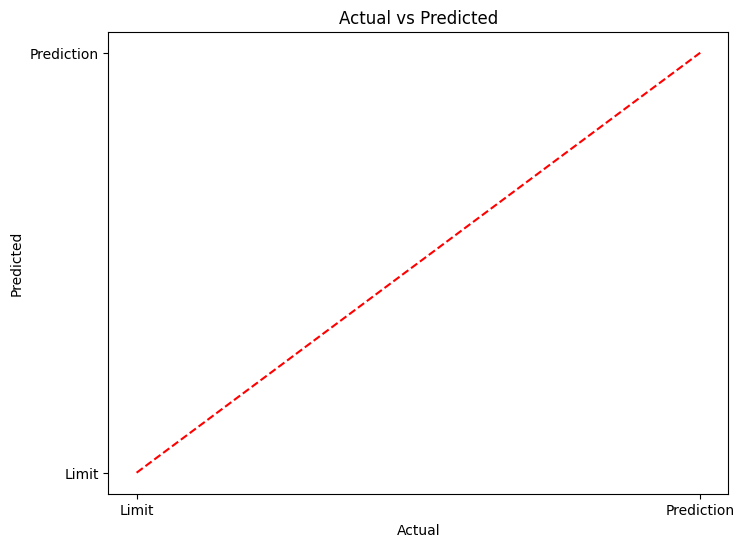

In [160]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test["Limit"], y_test["Prediction"])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
# #Linner Regression Evaluation :
# # 1. Residual Analysis
# 2. R-squared (R²) Score
# 3.Mean Absolute Error (MAE)
# 4.Mean Squared Error (MSE)
# 5.Root Mean Squared Error (RMSE)
# 6. Adjusted R-squared 

In [164]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Predict the target values
# y_pred = lr.predict(x_test)

# # Calculate residuals
# residuals = y_test["Limit"].raval() - y_test["Prediction"].raval()

# # Plot residuals
# sns.scatterplot(x=y_pred, y=residuals)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel('Fitted Values')
# plt.ylabel('Residuals')
# plt.title('Residuals vs Fitted Values')
# plt.show()


Model Save

In [165]:
import joblib 
import pickle 

In [166]:
joblib.dump(lr,"Credit-Limit-Prediction-Model.lb")

['Credit-Limit-Prediction-Model.lb']

In [167]:
model=joblib.load("Credit-Limit-Prediction-Model.lb")

Extra Work of flask


In [169]:
compare_df.columns

Index(['Gender', 'Income', 'Rating', 'Cards', 'Balance', 'Limit',
       'Prediction'],
      dtype='object')

In [171]:
x_tain

,Gender,Income,Rating,Cards,Balance
3,0.0,148.924,681,3,964
18,0.0,49.570,448,1,891
202,0.0,21.038,145,2,0
250,0.0,10.363,191,2,0
274,0.0,30.550,439,5,967
...,...,...,...,...,...
71,0.0,58.781,538,2,1103
106,1.0,16.819,115,2,0
270,1.0,15.866,217,1,136
348,1.0,13.433,112,3,0
